# 6.3 Geographic Visualization

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Toshiba\26-12-2023 Superstore Sales Analysis\02 Data\Original Data/us-states.json'

In [8]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Toshiba\26-12-2023 Superstore Sales Analysis\02 Data\Original Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [12]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\26-12-2023 Superstore Sales Analysis"

In [14]:
# Importing dataframe

sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Superstore_profit_sale_discount_year_col_add.csv'))

In [15]:
sales.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_type,Sale_category,Discount_applied,Year
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Positive Profit,High Sale,No,2016
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Positive Profit,High Sale,No,2016
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Positive Profit,High Sale,No,2016
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Negative Profit,High Sale,Yes,2015
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Positive Profit,High Sale,Yes,2015


In [19]:
sales.shape

(9994, 25)

### 2. Data wrangling 

In [21]:
sales.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'profit_type', 'Sale_category', 'Discount_applied', 'Year'],
      dtype='object')

In [22]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9994 non-null   int64  
 1   Row ID            9994 non-null   int64  
 2   Order ID          9994 non-null   object 
 3   Order Date        9994 non-null   object 
 4   Ship Date         9994 non-null   object 
 5   Ship Mode         9994 non-null   object 
 6   Customer ID       9994 non-null   object 
 7   Segment           9994 non-null   object 
 8   Country           9994 non-null   object 
 9   City              9994 non-null   object 
 10  State             9994 non-null   object 
 11  Postal Code       9994 non-null   int64  
 12  Region            9994 non-null   object 
 13  Product ID        9994 non-null   object 
 14  Category          9994 non-null   object 
 15  Sub-Category      9994 non-null   object 
 16  Product Name      9994 non-null   object 


In [26]:
sales.dtypes

Unnamed: 0            int64
Row ID                int64
Order ID             object
Order Date           object
Ship Date            object
Ship Mode            object
Customer ID          object
Segment              object
Country              object
City                 object
State                object
Postal Code           int64
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
profit_type          object
Sale_category        object
Discount_applied     object
Year                  int64
dtype: object

In [27]:
# Check for missing values

sales.isna().sum()

Unnamed: 0          0
Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
profit_type         0
Sale_category       0
Discount_applied    0
Year                0
dtype: int64

In [28]:
sales.isnull().sum()
# No values are missing

Unnamed: 0          0
Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
profit_type         0
Sale_category       0
Discount_applied    0
Year                0
dtype: int64

In [29]:
# Delete unnecessary columns
sales = sales.drop(columns=['Unnamed: 0'])

In [30]:
sales.dtypes

Row ID                int64
Order ID             object
Order Date           object
Ship Date            object
Ship Mode            object
Customer ID          object
Segment              object
Country              object
City                 object
State                object
Postal Code           int64
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
profit_type          object
Sale_category        object
Discount_applied     object
Year                  int64
dtype: object

In [32]:
# Checking for duplicates

sales_dup = sales.duplicated()

In [33]:
sales_dup

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [35]:
sales_dup.shape 
# No Duplicates are found

(9994,)

# 3. Checking for extreme values

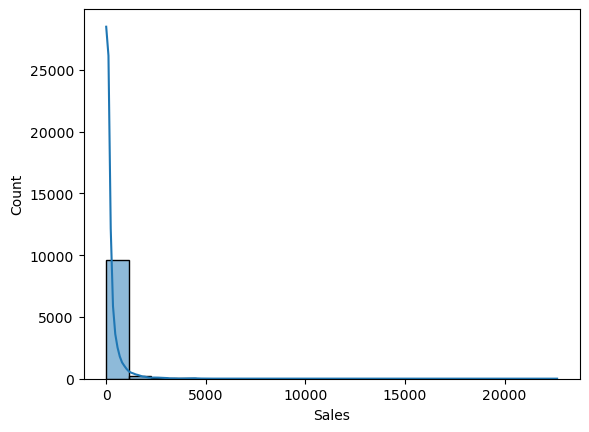

In [36]:
#Created a histogram for extreme values for Sales

hist_sales = sns.histplot(sales['Sales'], bins = 20, kde = True)


In [39]:
# Check how many extreme values

sales[sales['Sales'] >10000]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_type,Sale_category,Discount_applied,Year
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Home Office,United States,New York City,New York,...,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,Positive Profit,Low Sale,Yes,2017
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Home Office,United States,Jacksonville,Florida,...,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,Negative Profit,Low Sale,Yes,2014
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Consumer,United States,Newark,Delaware,...,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,Positive Profit,Low Sale,No,2017
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Corporate,United States,Lafayette,Indiana,...,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,Positive Profit,Low Sale,No,2016
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Consumer,United States,Seattle,Washington,...,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,Positive Profit,Low Sale,No,2017


In [40]:
# Clean extreme values

sales = sales[sales['Sales'] < 10000] 


In [41]:
sales.shape

(9989, 24)

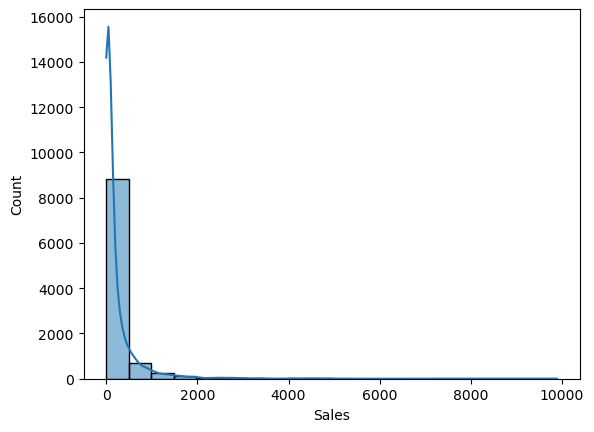

In [42]:
# Created a histogram without the extreme values for Sales

hist_sales1 = sns.histplot(sales['Sales'], bins = 20, kde = True)


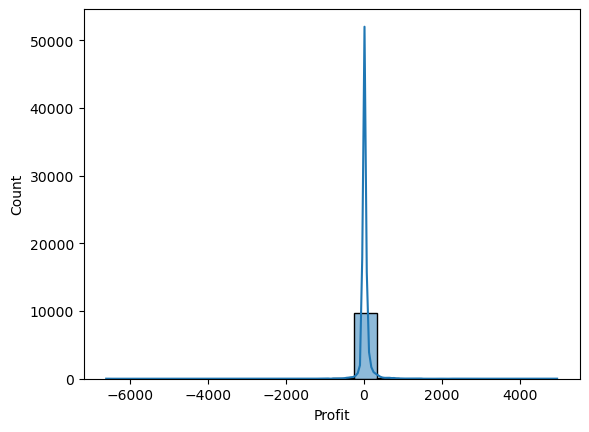

In [43]:
#Created a histogram for extreme values for Profit

hist_profit = sns.histplot(sales['Profit'], bins = 20, kde = True)


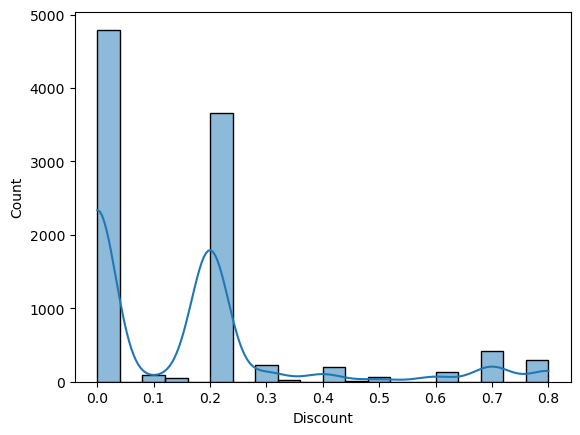

In [44]:
#Created a histogram for extreme values for Discount

hist_discount = sns.histplot(sales['Discount'], bins = 20, kde = True)

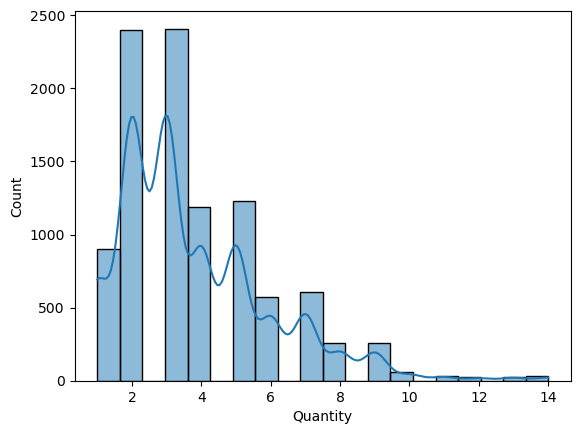

In [45]:
#Created a histogram for extreme values for Quantity

hist_quantity = sns.histplot(sales['Quantity'], bins = 20, kde = True)

# 4. Plotting a Choropleth

### a) Plotting a Choropleth between State and Sales Count.

In [70]:
# Creating a data frame with the states and the count of the sales that we want to plot
# Sales count per state
Sales_counts = sales.groupby('State')['Sales'].count()

In [71]:
Sales_counts

State
Alabama                   61
Arizona                  224
Arkansas                  60
California              2001
Colorado                 182
Connecticut               82
Delaware                  95
District of Columbia      10
Florida                  382
Georgia                  184
Idaho                     21
Illinois                 492
Indiana                  148
Iowa                      30
Kansas                    24
Kentucky                 139
Louisiana                 42
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 255
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               130
New Mexico                37
New York                1127
North Carolina           249
North Dakota               7
Ohio                     469
Oklahoma

In [73]:
Sales_per_state = sales.groupby('State')['Sales'].nunique().reset_index(name='sales_count')

In [74]:
Sales_per_state

,State,sales_count
0,Alabama,61
1,Arizona,216
2,Arkansas,58
3,California,1534
4,Colorado,179
5,Connecticut,80
6,Delaware,93
7,District of Columbia,10
8,Florida,355
9,Georgia,175


In [78]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Add the choropleth layer
folium.Choropleth(
    geo_data= country_geo,
    data=Sales_per_state,
    columns=['State', 'sales_count'],  # Adjust these column names based on your DataFrame
    key_on='feature.properties.name',  # Adjust based on your GeoJSON file
    fill_color='YlOrBr', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Number of Sales per State').add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map


In [108]:
# Save the map as an HTML file
map.save('Number of sale per state.html')

In [ ]:
# We can see that the count of sales is the highest for California, NewYork,Texas,Pennysylvania, Illnois and Washington.

### b) Plotting a Choropleth between State and Total sales

In [80]:
# Creating a data frame with the states and the total sum of the sales that we want to plot
# Total sales per state
Sales_sum = sales.groupby('State')['Sales'].sum()

In [81]:
# Displaying the total sales per state
Sales_sum

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 16951.0990
District of Columbia      2865.0200
Florida                  66835.2280
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  36055.4100
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [82]:
Total_amount_Sales_per_state = sales.groupby('State')['Sales'].nunique().reset_index(name='sales_sum')

In [83]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Add the choropleth layer
folium.Choropleth(
    geo_data= country_geo,
    data=Total_amount_Sales_per_state,
    columns=['State', 'sales_sum'],  # Adjust these column names based on your DataFrame
    key_on='feature.properties.name',  # Adjust based on your GeoJSON file
    fill_color='YlOrBr', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Total amount of Sales per State').add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map

In [84]:
# Save the map as an HTML file
map.save('Total amount of Sales per State.html')

In [100]:
# We can see that the highest sales are coming from California,Texas, New York , Pennysylvania and Illnois.

### c) Plotting a Choropleth between State and total Profit

In [85]:
# Creating a data frame with the states and the total sum of the profit that we want to plot
# Total profit per state
Profit_sum = sales.groupby('State')['Profit'].sum()

In [86]:
# Displaying the profit per state
Profit_sum

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 4937.3892
District of Columbia     1059.5893
Florida                 -1588.2233
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                  9982.9603
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

In [88]:
Total_profit_per_state = sales.groupby('State')['Profit'].nunique().reset_index(name='profit_sum')

In [89]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Add the choropleth layer
folium.Choropleth(
    geo_data= country_geo,
    data=Total_profit_per_state,
    columns=['State', 'profit_sum'],  # Adjust these column names based on your DataFrame
    key_on='feature.properties.name',  # Adjust based on your GeoJSON file
    fill_color='YlOrBr', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Total Profit per State').add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map

In [90]:
# Save the map as an HTML file
map.save('Total profit per State.html')

In [91]:
# The highest profits are coming from California and New York.

### d) Plotting a Choropleth between State and total Quantity

In [101]:
# Creating a data frame with the states and the quantity available that we want to plot
# Quantity count per state
Quantity_sum = sales.groupby('State')['Quantity'].sum()

In [102]:
Quantity_sum

State
Alabama                  256
Arizona                  862
Arkansas                 240
California              7667
Colorado                 693
Connecticut              281
Delaware                 364
District of Columbia      40
Florida                 1373
Georgia                  705
Idaho                     64
Illinois                1845
Indiana                  573
Iowa                     112
Kansas                    74
Kentucky                 523
Louisiana                156
Maine                     35
Maryland                 420
Massachusetts            491
Michigan                 946
Minnesota                331
Mississippi              221
Missouri                 252
Montana                   56
Nebraska                 136
Nevada                   168
New Hampshire            127
New Jersey               454
New Mexico               151
New York                4220
North Carolina           983
North Dakota              30
Ohio                    1759
Oklahoma

In [103]:
Quantity_per_state = sales.groupby('State')['Quantity'].nunique().reset_index(name='quantity_sum')

In [104]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Add the choropleth layer
folium.Choropleth(
    geo_data= country_geo,
    data=Quantity_per_state,
    columns=['State', 'quantity_sum'],  # Adjust these column names based on your DataFrame
    key_on='feature.properties.name',  # Adjust based on your GeoJSON file
    fill_color='YlOrBr', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Quantity per State').add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map


In [106]:
# Save the map as an HTML file
map.save('Quantity per state.html')

In [105]:
# The States which had high quantities are California,New York and Texas.There are few more States with good quantities.